In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Read CSV
path = "/content/heart_2020_cleaned.csv"
df = pd.read_csv(path)

# Shape
rows,columns = df.shape
print(f"[i] Shape: {rows},{columns}")

# Columns
print(f"[i] Length: {rows}")
print(f"Columns\n{'-' * 15}")
for column in df.columns:
    print(column)

[i] Shape: 53005,18
[i] Length: 53005
Columns
---------------
HeartDisease
BMI
Smoking
AlcoholDrinking
Stroke
PhysicalHealth
MentalHealth
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
SleepTime
Asthma
KidneyDisease
SkinCancer


In [4]:
# Print First few data
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53005 entries, 0 to 53004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      53005 non-null  object 
 1   BMI               53005 non-null  float64
 2   Smoking           53005 non-null  object 
 3   AlcoholDrinking   53005 non-null  object 
 4   Stroke            53005 non-null  object 
 5   PhysicalHealth    53005 non-null  float64
 6   MentalHealth      53005 non-null  float64
 7   DiffWalking       53005 non-null  object 
 8   Sex               53005 non-null  object 
 9   AgeCategory       53005 non-null  object 
 10  Race              53005 non-null  object 
 11  Diabetic          53005 non-null  object 
 12  PhysicalActivity  53005 non-null  object 
 13  GenHealth         53005 non-null  object 
 14  SleepTime         53005 non-null  float64
 15  Asthma            53005 non-null  object 
 16  KidneyDisease     53005 non-null  object

In [6]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,53005.0,28.011029,6.290913,12.13,23.71,26.99,31.09,87.05
PhysicalHealth,53005.0,3.579625,8.147079,0.00,0.00,0.00,2.00,30.00
MentalHealth,53005.0,4.035280,8.051514,0.00,0.00,0.00,4.00,30.00
SleepTime,53005.0,7.125460,1.515022,1.00,6.00,7.00,8.00,24.00


In [7]:
# Describe - Categorical
df.describe(include="object").T

,count,unique,top,freq
HeartDisease,53005,2,No,48374
Smoking,53005,2,No,30489
AlcoholDrinking,53005,2,No,49345
Stroke,53005,2,No,50883
DiffWalking,53005,2,No,45328
Sex,53005,2,Female,27982
AgeCategory,53005,13,65-69,5504
Race,53005,6,White,37944
Diabetic,53005,4,No,44785
PhysicalActivity,53005,2,Yes,41045


array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

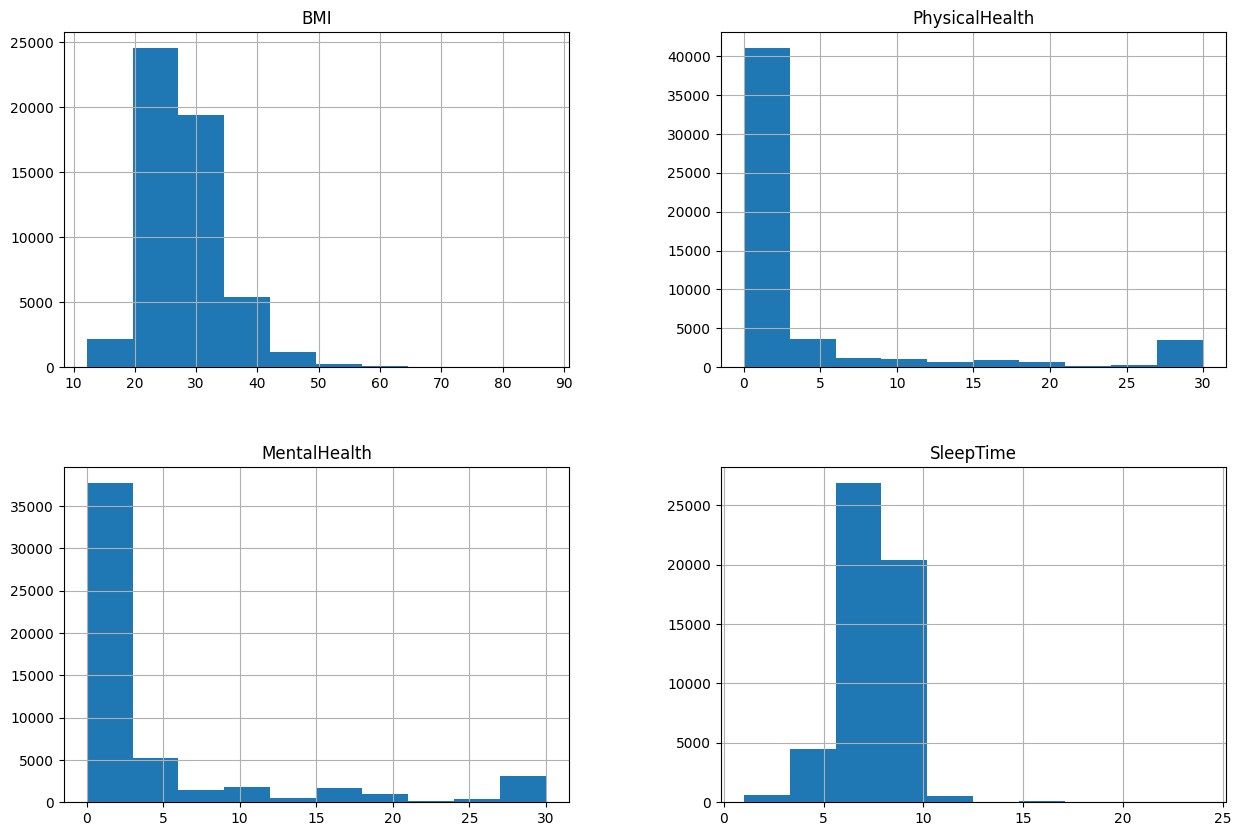

In [8]:
# Distribution
df.hist(figsize=(15,10))

In [9]:
# Missing Values
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [10]:
# test = df["HeartDisease"]
# test = test.replace(['No','Yes'],[0,1])

In [11]:
# List of calumns that contains Yes/No
YesNoCol = ["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]
for col in YesNoCol:
    df[col] = df[col].replace(['No','Yes'],[0,1])
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,Female,75-79,Black,No,0,Fair,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,Female,70-74,White,No,1,Fair,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,Female,80 or older,White,Yes,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,Female,80 or older,White,"No, borderline diabetes",0,Fair,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,Male,65-69,White,No,1,Good,10.0,0,0,0


In [12]:
# Basic stats after encoding
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDisease,53005.0,0.087369,0.282378,0.00,0.00,0.00,0.00,1.00
BMI,53005.0,28.011029,6.290913,12.13,23.71,26.99,31.09,87.05
Smoking,53005.0,0.424790,0.494316,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,53005.0,0.069050,0.253542,0.00,0.00,0.00,0.00,1.00
Stroke,53005.0,0.040034,0.196041,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,53005.0,3.579625,8.147079,0.00,0.00,0.00,2.00,30.00
MentalHealth,53005.0,4.035280,8.051514,0.00,0.00,0.00,4.00,30.00
DiffWalking,53005.0,0.144835,0.351938,0.00,0.00,0.00,0.00,1.00
PhysicalActivity,53005.0,0.774361,0.418006,0.00,1.00,1.00,1.00,1.00
SleepTime,53005.0,7.125460,1.515022,1.00,6.00,7.00,8.00,24.00


In [13]:
# Seeing Info about Categorical Datas
df.describe(include = "object").T

,count,unique,top,freq
Sex,53005,2,Female,27982
AgeCategory,53005,13,65-69,5504
Race,53005,6,White,37944
Diabetic,53005,4,No,44785
GenHealth,53005,5,Very good,18312


In [14]:
# Unique Values in each categorical columns
CategoricalCol = ["Sex","AgeCategory","Race","Diabetic","GenHealth"]
for col in CategoricalCol:
#     print(f"{col}: {df[col].unique()}")
    print(df[col].value_counts())
    print("-" * 20)

Sex
Female    27982
Male      25023
Name: count, dtype: int64
--------------------
AgeCategory
65-69          5504
60-64          5443
70-74          5264
55-59          4842
80 or older    4271
50-54          4230
75-79          3887
45-49          3624
35-39          3383
40-44          3336
18-24          3206
30-34          3179
25-29          2836
Name: count, dtype: int64
--------------------
Race
White                             37944
Hispanic                           6129
Black                              4839
Other                              1761
American Indian/Alaskan Native     1224
Asian                              1108
Name: count, dtype: int64
--------------------
Diabetic
No                         44785
Yes                         6633
No, borderline diabetes     1214
Yes (during pregnancy)       373
Name: count, dtype: int64
--------------------
GenHealth
Very good    18312
Good         15199
Excellent    11418
Fair          6009
Poor          2067
Name: count, 

<Axes: >

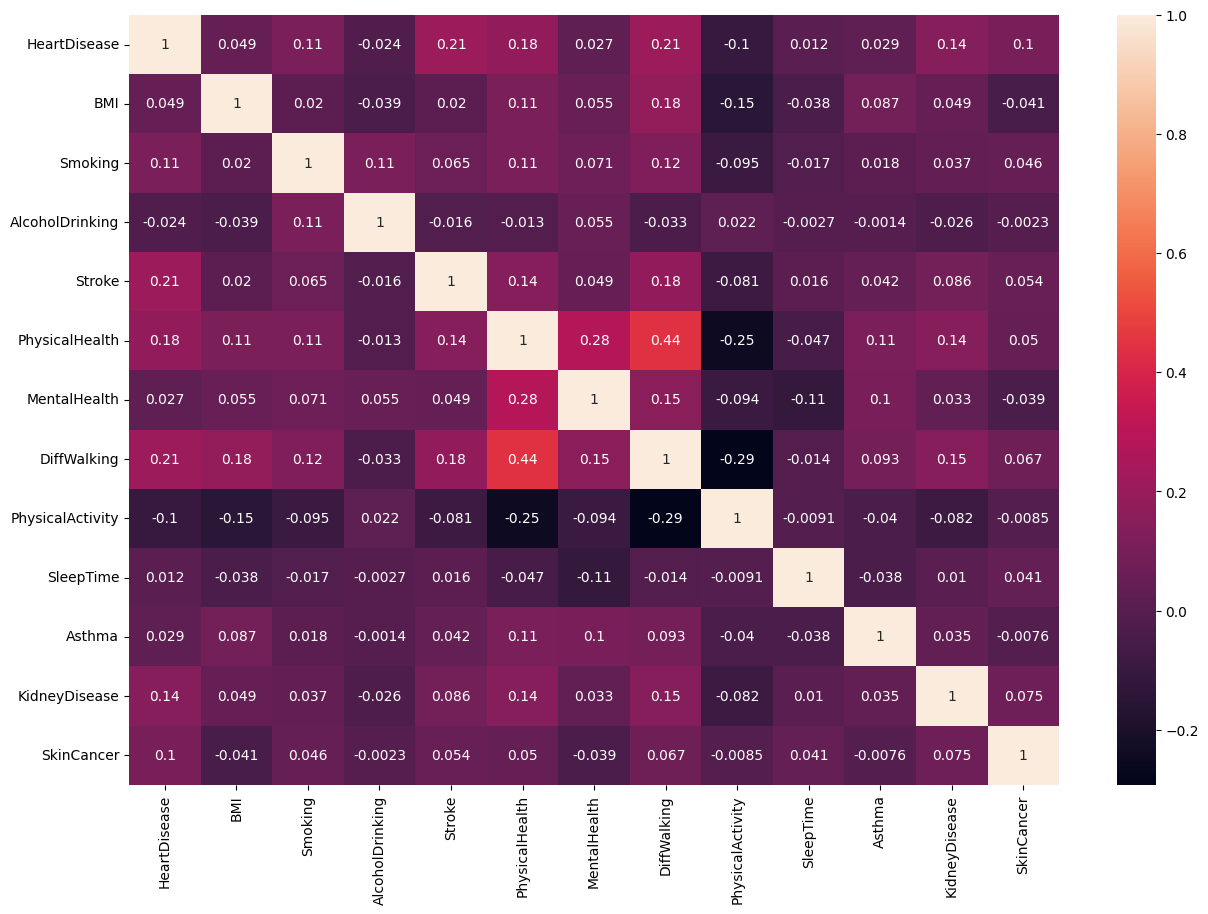

In [18]:
# Correlation Visualization
plt.figure(figsize=(15,10))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
correlation = numerical_df.corr()
sb.heatmap(correlation, annot=True)